### A/B Testing

- A controlled experiment, usually in the context of a website
- You test the performance of some change to your website (the variant) and measure conversion relative to your unchanged site (the control).

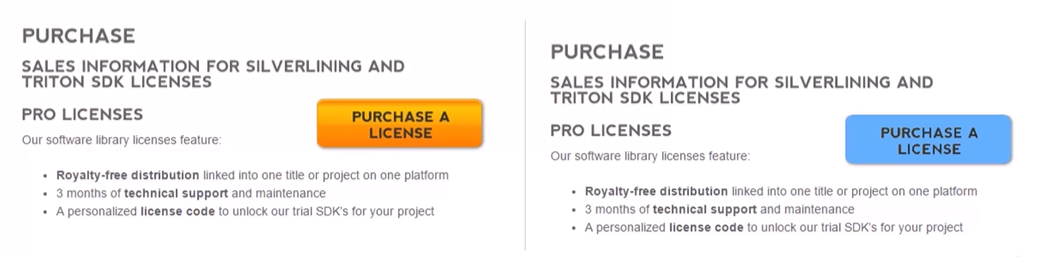

Ideally choose what you are trying to influence:
- oder amount
- profit
- ad clicks
- order quantity

But attributing actions downstream from your change can be hard
- Especially if you;re running more than one experiment

**VARIANCE IS THE ENEMY**
Common mistake:
- Run a test for some small period of time that results in a few purchases to analyze
- You take the mean order amount from a and B, and declare victory or defeat
- But there's so much random variation in order amounts to begin with, tha your results was just based on chance
- You then fool yourself into thinking some change to your website, which could actually be harmful, has made tons of money
- Sometimes you need to also look at conversion metrics with less variance
- Order quantities vs order dollar amounts, for example

### T-Tests and P-Values

So, how do we know if a result is likely to be "real" as opposed to just random variation?

T-Test and P-Values!

#### The T-Statistic

- A measure of the difference between the two sets expressed in units of standard error
- The size of the difference relative to the variance in the data
- A high T value means there's probably a real difference between the two sets
- Assumes a normal distribution of behavior
    - This is a good assumption of you're measuring revenue as conversion
    - Fisher's exact test (clickthrough rates), E-test (for transactions per user), and chi-squared test (for product quantities purchased)

- miara różnicy między dwoma zestawami wyrażona w jednostkach błędu standardowego
- wielkość różnicy w stosunku do wariancji danych
- Wysoka wartość T oznacza, że prawdopodobnie istnieje prawdziwa różnica między dwoma zestawami
- Zakłada normalny rozkład zachowania
     - To dobre założenie, że mierzysz przychody jako konwersje
     - Dokładny test Fishera (współczynniki klikalności), E-test (dla transakcji na użytkownika) i test chi-kwadrat (dla ilości zakupionych produktów)

#### The P-Value
- Think of it as the probability of A and B satisfying the "null hypothesis" (that there is no real difference between the control and treatment's behaviour)
- **So, a low P-Value implies significance.**
- It is the probability of an observer lying at an extreme t-value assuming the null hypothesis.

- Potraktuj to jako prawdopodobieństwo spełnienia przez A i B „hipotezy zerowej” 
- Tak więc niska wartość P oznacza znaczenie.
- Jest to prawdopodobieństwo, że obserwator leży na skrajnej wartości t przy założeniu hipotezy zerowej.

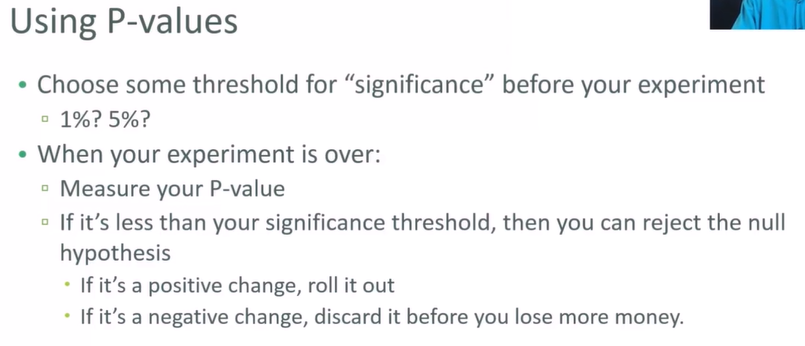

In [1]:
import numpy as np
from scipy import stats

A = np.random.normal(25.0, 5.0, 10000)
B = np.random.normal(26.0, 5.0, 10000)

In [2]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-14.20191652286491, pvalue=1.4847065535663492e-45)

The t-statistic is a measure of the difference between the two sets expressed in units of standard error. Put differently, it's the size of the difference relative to the variance in the data. A high t value means there's probably a real difference between the two sets; you have "significance". The P-value is a measure of the probability of an observation lying at extreme t-values; so a low p-value also implies "significance." If you're looking for a "statistically significant" result, you want to see a very low p-value and a high t-statistic (well, a high absolute value of the t-statistic more precisely). In the real world, statisticians seem to put more weight on the p-value result.

In [3]:
B = np.random.normal(25.0, 5.0, 10000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=-0.07828796143840591, pvalue=0.9375997767163184)

In [4]:
A = np.random.normal(25.0, 5.0, 100000)
B = np.random.normal(25.0, 5.0, 100000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=0.5752102121870725, pvalue=0.5651497840962222)

Our p-value actually got a little lower, and the t-test a little larger, but still not enough to declare a real difference. So, you could have reached the right decision with just 10,000 samples instead of 100,000. Even a million samples doesn't help, so if we were to keep running this A/B test for years, you'd never acheive the result you're hoping for:

In [6]:
A = np.random.normal(25.0, 5.0, 1000000)
B = np.random.normal(25.0, 5.0, 1000000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=0.16312002647674892, pvalue=0.8704239486112085)

In [7]:
stats.ttest_ind(A, A)

Ttest_indResult(statistic=0.0, pvalue=1.0)

#### How do I know when I'm done with A/B test?
- You have achieved significance (positive or negative)
- You no longer observe meaningful trends in your p-value
    - That is, you don't see any indication that your experiment will "converge" on a result over time
- You reach some pre-established upper bound on time

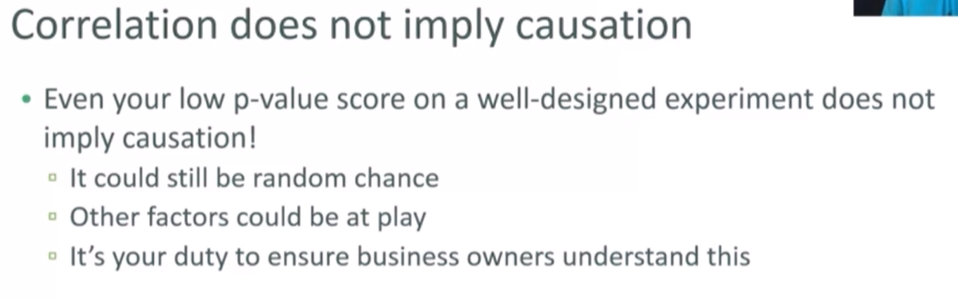

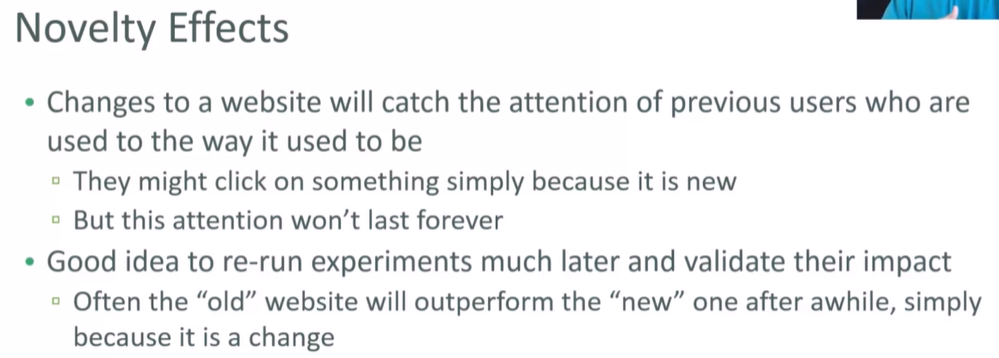

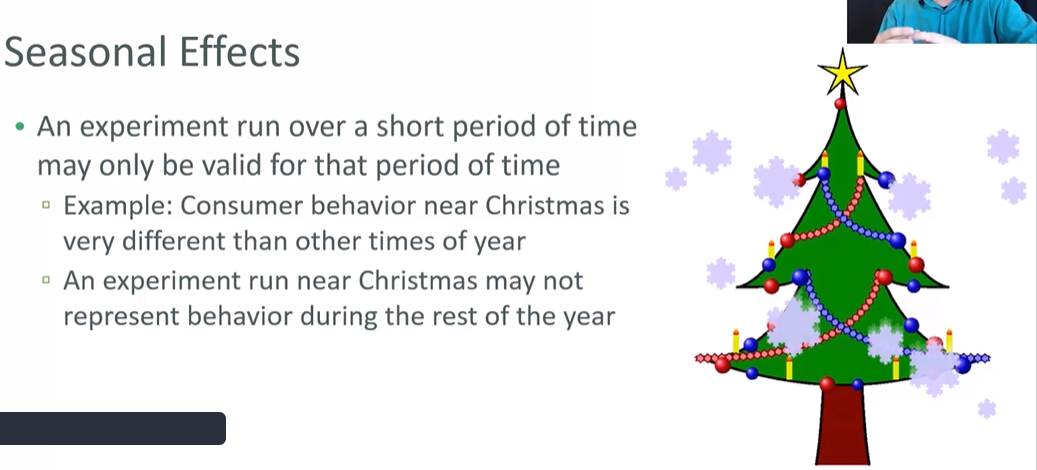

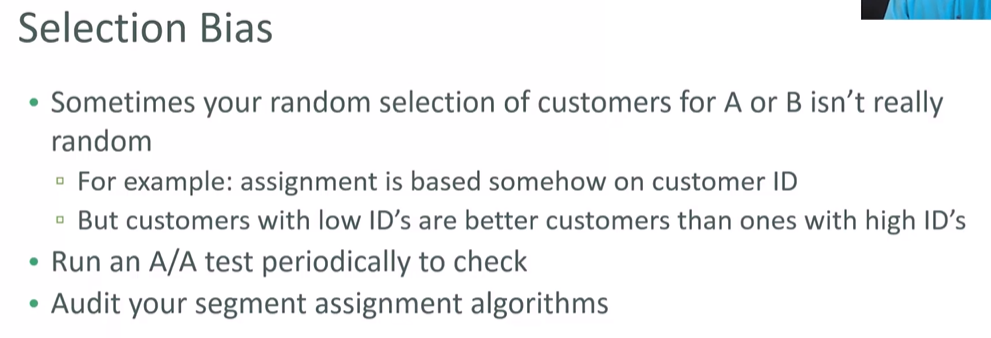

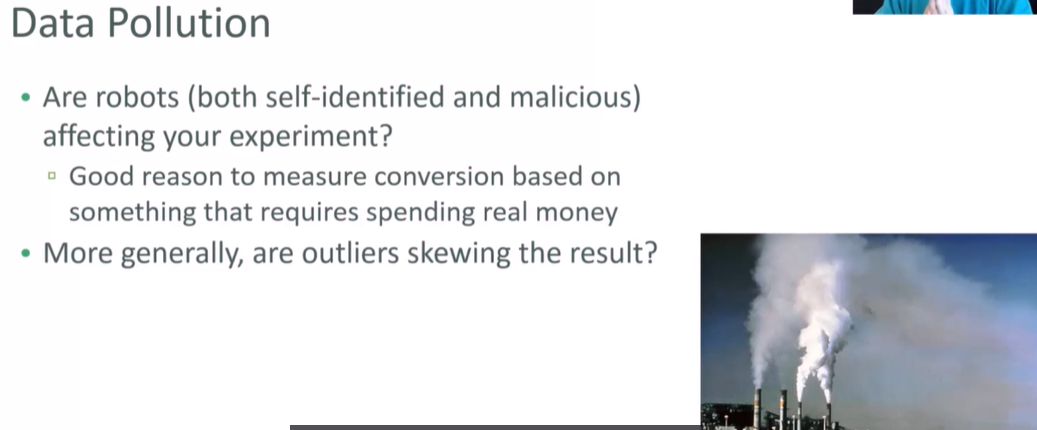

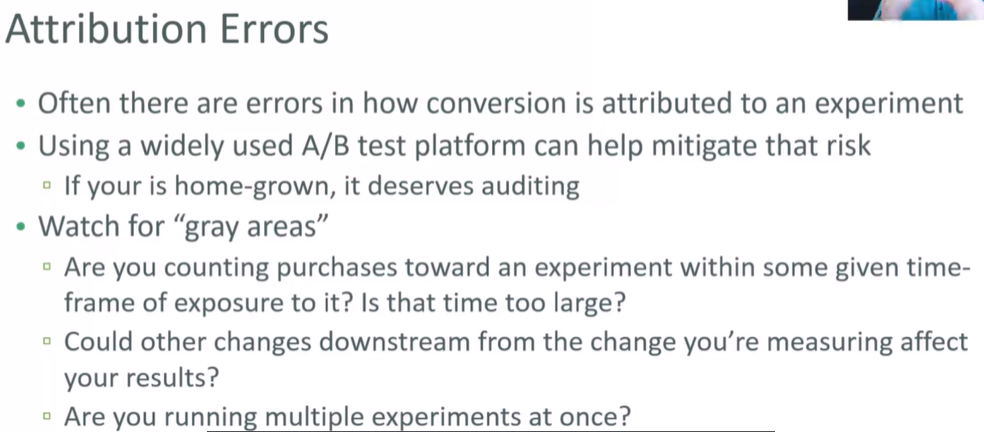